# Examen 1
## Aquino Chapa Martha Abril
Hecho en Python 🐍

In [1]:
#importamos las paqueterías
from pylab import *
import random
from numpy import array
import math

### 1.En clase vimos como en un arreglo puede representar la gráfica de una función f(x) con los puntos {xi,fi} con i = 1, 2, 3, ..., N. También vimos como obtener las primeras derivadas numéricas en cadapunto, f'(xi) y f''(xi), es decir, podemos obtener el conjunto de puntos {xi, f'i } y {xi, f''i}. Esteproblema consiste en hacer lo mismo pero para el caso de la integral, y para ello realice una función que tenga como entrada los puntos {xi, fi} y que regrese {xi, Fi}, donde Fi representa la integral de la función hasta el xi-ésimo punto. Para corroborar que su función trabaja de manera adecuada, puede utilizar la función cos(x) en el intervalo [0, 2π]. Puede utilizar cualquier algoritmo de integración que vimos en clase o en las tareas.


In [22]:
#Definimos la función que nos de la integral hasta el punto xi
def fun1(x,f):
    #Hacemos un arreglo que llenaremos de los valores de la integral hasta el punto xi
    F=np.zeros(len(f))
    #Definimos la distancia entre los puntos de la malla, donde suponemos que esta es uniforme 
    h=x[1]-x[0]
    #Definimos la función para las fronteras, en este caso para los primeros 4 puntos de la malla
    #La integral sobre un punto, en este caso el primero, debe ser 0
    F[0]=0
    #Por trigonometría la función para los puntos 3-1 se puede definir, aproximando, como:
    F[1]=(f[1]-f[0])*h
    F[2]=(f[2]-f[1])*h+F[1]
    F[3]=(f[3]-f[2])*(h)+F[2]
    
    #A partir del 5 elemento podemos usar el algoritmo para la integral de x_i-1 a x_i+1, simétrica
    #Definimos entonces está función para los puntos restantes, esta parte del código tiene la misma lógica que la función int_alg2 vista en clase
    for i in range (4,len(f)):
            if mod((i),2) == 1:
                #En este caso le sumaremos las partes de la integral a la entrada F[i]
                F[i]=0
                for j in range(1,i-1,2):
                    F[i] += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                #En el caso de que nos quedé un elemento en la frontera, se definirá F[i] como
            if mod((i),2) == 0:
                #Definimos una variable auxiliar a la que le sumaremos las particiones de la integral
                p=0
                for j in range(2,i-1,2):
                    p += (f[j+1] + 4*f[j] + f[j-1])*(h/3)
                #En esta caso, definimos la entrada F[i] de la función como la suma de la integral guardada en p, más la integral en la frontera
                    F[i]=p+(h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
            
    return F

Probemos ahora nuestra integral con la función definida anteriormente. Para ello graficaremos la integral del cos(x) de 0 a $2\pi$, así como el sen(x) en el mismo intervalo.

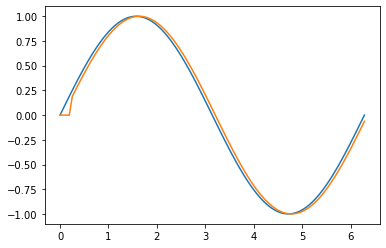

In [23]:
#Definimos nuestra malla
x=linspace(0,2*pi,100)
#Graficamos la integral del Coseno punto a punto, es decir el Seno evaluado en la malla
plot(x,np.sin(x))
#Graficamos la integral punto a punto del coseno con fun1
plot(x,fun1(x,np.cos(x)))


Probamos nuestra función con más puntos en la malla para que las distancias entre puntos contiguos sea menor.

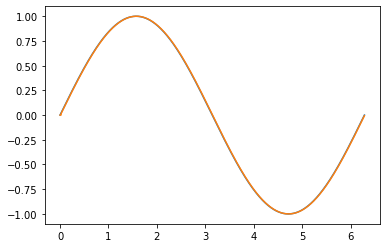

In [24]:
#Definimos nuestra malla
x=linspace(0,2*pi,1000)
#Graficamos la integral del Coseno punto a punto, es decir el Seno evaluado en la malla
plot(x,np.sin(x))
#Graficamos la integral punto a punto del coseno con fun1
plot(x,fun1(x,np.cos(x)))

Como se ha apreciado, nuestra función se acerca más a la real conforme los puntos en la malla están a distancias contiguas menores.

### 2. En la página del curso, en la misma sección donde está este examen, hay un archivo que se llama t_acel.dat. Este es un archivo de texto que contiene datos de tiempos, $t_i$, y aceleración, $a_i$, acomodados endos columnas. Descargue el archivo en el mismo directorio donde está realizando su notebook. 

#### a) Haga la gráfica de datos

In [5]:
#Importamos los datos
datos = loadtxt ('t_acel.dat' )
#Nombramos a los datos correspondientes al tiempo como ti
ti=datos[:,0]
#Nombramos a los datos correspondientes a la aceleración como ai
ai=datos[:,1]

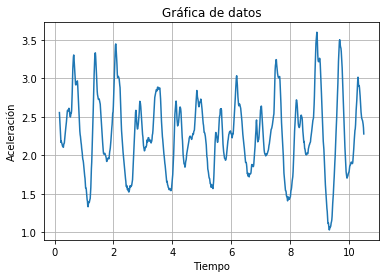

In [6]:
#Graficamos los datos
title("Gráfica de datos"),xlabel("Tiempo"),ylabel('Aceleración'),grid()
plot(datos[:,0],datos[:,1],label='1')

#### b) Calcule la derivada en cada punto utilizando algoritmos que desprecian términos en $h^{3}$ y $h^{5}$. Compare las gráficas de cada uno de los algoritmos y proporcione el error máximo entre los algoritmos utilizados.


Antes de empezar a trabajar con las derivadas, debemos observar si la malla es uniforme.

In [7]:
#Definimos un arreglo que llenaremos de la diferencia del tiempo entre dos puntos contiguos
malla=np.zeros(len(datos[:,0])-1)
#Definimos un ciclo for para obtener las diferencia entre puntos
for i in range (len(datos[:,0])-1):
    malla[i]=ti[i+1]-ti[i]
#Obtenemos la diferencia entre el espacio más grande entre puntos y el más pequeño
print(max(malla)-min(malla))

0.0010000000000016662


Vemos entonces que debido a que el máximo y el mínimo no son iguales, entonces la malla no es uniforme. Sin embargo comparemos los puntos en la malla con los números naturales.

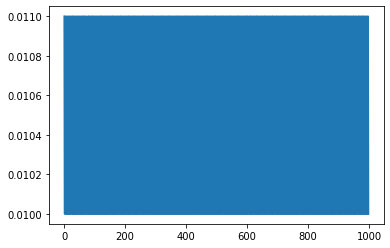

In [8]:
plot(malla)

Con la gráfica anterior notamos que nuestra malla es prácticamente uniforme, por lo que la trataremos como tal.

En la tarea vimos que la derivada de segundo orden está dada por:

$$ f'(x_i)=\frac{f_{i+1}-f_{i-1}}{x_{i+1}-x_{i-1}}$$

Y en los extremos se deben usar las relaciones:

$$f'(x_0)=\frac{-0.5f_2+2f_1-1.5f_0}{x_1-x_0}$$

$$f'(x_0)=-\frac{-0.5f_2+2f_1-1.5f_0}{x_{N}-x_{N-1}}$$

Donde estamos asumiento que nuestro conjuntos de puntos tiene N+1 elementos.

Ahora si, definamos nuestra función para obtener las derivada de orden 2, donde se desprecian términos $h^{3}$.

In [9]:
#Definimos la derivada de orden 3, la cual tomaremos del notebook 3
def deriv_h3(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    dosh = 2*h
    for i in range(1,len(f)-1):
        f_prima[i] = ( f[i+1]-f[i-1] )/(dosh)
    # calcular el primer punto
    f_prima[0] = ( -0.5*f[2] + 2*f[1] -1.5*f[0] )/h
    # calcular el ultimo punto
    f_prima[-1] = -( -0.5*f[-3] + 2*f[-2] -1.5*f[-1] )/h    
    return f_prima

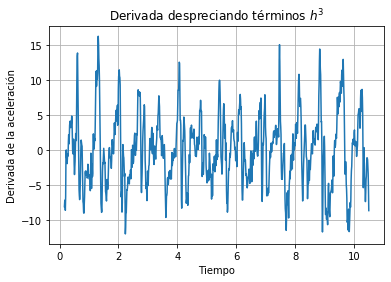

In [10]:
#Graficamos ahora la derivada en cada tiempo, donde f serán las aceleraciónes y x los tiempos
title(r"Derivada despreciando términos $h^{3}$"),xlabel("Tiempo"),ylabel('Derivada de la aceleración'),grid()
plot(datos[:,0],deriv_h3(datos[:,1],datos[:,0]))

Ahora, para la derivada de orden 4 donde se desprecian términos $h^{5}$ se tiene que está está dada por la expresión:
$$f'(x_0)={\frac{1}{12h}}(-f_{i+2}+8f_{i+1}-8f_{i-1}+f_{i-2})$$

Y en la frontera izquierda la derivada está dada por:
$$f'(x_0)={\frac{1}{h}}(-\frac{25}{12}f_i+4f_{i+1}-3f_{i+2}+{\frac{4}{3}}f_{i+3}-{\frac{1}{4}}f_{i+4} $$    

Sin embargo para la frontera derecha solo se debe realizar el cambio de variables: $1\rightarrow -1$, $2\rightarrow-2$, $3\rightarrow-3$, $4\rightarrow-4$.
Usando el código deriv_h5 presentado en el nootebook 3 del curso.

In [11]:
def deriv_h5(f,x):
    f_prima = zeros(len(f))
    h = x[1] - x[0]
    doceh = 12*h
    for i in range(2,len(f)-2):
        f_prima[i] = ( -f[i+2]+ 8*(f[i+1]-f[i-1]) +f[i-2] )/(doceh)
    c0,c1,c2,c3,c4 = -25/12,4,-3,4/3,-0.25
    # calcular el primer punto
    f_prima[0] = ( c0*f[0] + c1*f[1] + c2*f[2] + c3*f[3] + c4*f[4] )/h
    # calcular el segundo punto
    f_prima[1] = ( c0*f[1] + c1*f[2] + c2*f[3] + c3*f[4] + c4*f[5] )/h
    # calcular el ultimo punto o el punto N
    f_prima[-1] = -( c0*f[-1] + c1*f[-2] + c2*f[-3] + c3*f[-4] + c4*f[-5] )/h
    # calcular el penultimo punto o el N-1
    f_prima[-2] = -( c0*f[-2] + c1*f[-3] + c2*f[-4] + c3*f[-5] + c4*f[-6] )/h
    return f_prima

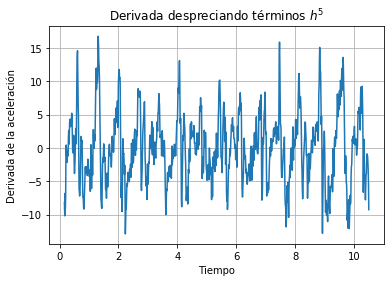

In [12]:
#Graficamos ahora la derivada en cada tiempo, donde f serán las aceleraciónes y x los tiempos
title(r"Derivada despreciando términos $h^{5}$"),xlabel("Tiempo"),ylabel('Derivada de la aceleración'),grid()
plot(datos[:,0],deriv_h5(datos[:,1],datos[:,0]))

Comparamos ahora las gráficas:

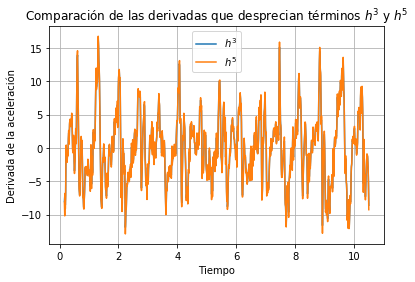

In [13]:
#Graficamos las derivadas en cada tiempo, donde f serán las aceleraciónes y x los tiempos
plot(datos[:,0],deriv_h3(datos[:,1],datos[:,0]),label="$h^{3}$")
plot(datos[:,0],deriv_h5(datos[:,1],datos[:,0]),label="$h^{5}$")
title(r"Comparación de las derivadas que desprecian términos $h^{3}$ y $h^{5}$"),xlabel("Tiempo"),ylabel('Derivada de la aceleración')
grid(),legend()
show()

Obtendamos ahora el error máximo entre ambos algoritmos.

In [14]:
print("El error máximos entre ambos algoritmos es:")
print(max(abs(deriv_h3(datos[:,1],datos[:,0])-deriv_h5(datos[:,1],datos[:,0]))))

El error máximos entre ambos algoritmos es:
2.923913117495892


#### c) Calcule la integral total de los datos con el algoritmo int_alg2 que viene en el NB 6 de la página del curso y compare el resultado utilizando el algoritmo de Boole. ¿Cuál es la diferencia numérica entre ambos algoritmos?

En clase vimos que este algoritmo está dado por la función int_algo2.

In [15]:
#Definimos la función int_alg2
def int_alg2(x,y):
    integral = 0
    h = x[1] - x[0]
    if mod(len(y),2) == 0:
        inicio = 2
    elif mod(len(y),2) == 1:
        inicio = 1
    for i in range(inicio,len(y)-1,2):
        integral += y[i+1] + 4*y[i] + y[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(y),2) == 0:
        integral += (h/48)*(23*y[0] + 26*y[1] - 4*y[2] + 6*y[3] -3*y[4])
    return integral

In [16]:
#Obtenemos el valor de la integral:
print('La integral con el algoritmo int_algo2 es:',int_alg2(ti,ai))

La integral con el algoritmo int_algo2 es: 24.989833109037374


Extraemos la función de integral de Boole de la tarea 2 del curso:

In [17]:
#Definimos la función que nos calcule la integral de Boole
def intBoole(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla, menos un punto, en la cual vamos a integrar es divisible entre 4, pedimos que saque la integral del a partir del primer elemento
    if mod(len(f)-1,4) == 0:
        inicio = 0
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4 es 1, pedimos que saque la integral del a partir del segundo elemento de la malla
    if mod(len(f)-1,4) == 1:
        inicio = 1
        
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4, es 2, pedimos que saque la integral del a partir del tercer elemento de la malla
    if mod(len(f)-1,4) == 2:
        inicio = 2
        
    #Si el residuo de el num de puntos en la malla,menos 1, entre 4, es 3 pedimos que saque la integral del a partir del cuarto elemento de la malla
    if mod(len(f)-1,4) == 3:
        inicio = 3
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 4 puntos
    for i in range(inicio,len(f)-4 ,4):
        integral += 7*f[i]+32*f[i+1]+12*f[i+2]+32*f[i+3]+7*f[i+4]
    integral = integral*(2*h/45)
    #Definimos la integral correspondiente a los puntos frontera para sumarlos a la integral total.
    
    if mod(len(f)-1,4) == 3:
        integral +=(f[i]+3*f[i+1]+3*f[i+2]+f[i+3])*(3*h/8)
    
    if mod(len(f)-1,4) == 2:
        integral += ((f[0] + 4*f[1] + f[2]))*(h/3)
        
    
    if mod(len(f)-1,4) == 1:
        integral += (h/48)*(23*f[0]+ 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
        #integral += (h/48)*(23*f[0]*f[0] + 26*f[1]*f[1] - 4*f[2]*f[2] + 6*f[3]*f[3] -3*f[4]*f[4])
    return integral

In [18]:
#Obtenemos el valor de la integral:
print('La integral de Boole es:',intBoole(ai,ti))

La integral de Boole es: 22.717627967639356


Obteniendo la diferencia numérica:

In [19]:
print("La diferencia númerica entre la integral con int_alg2 y intBoole es:")
print(abs(intBoole(ai,ti)-int_alg2(ti,ai)))

La diferencia númerica entre la integral con int_alg2 y intBoole es:
2.272205141398018


#### d) Calcule la integral total de los datos con el algoritmo int_alg2 que viene en el NB 6 de la página del curso y compare el resultado utilizando el algoritmo de Boole. ¿Cuál es la diferencia numérica entre ambos algoritmos?

Para este ejercicio, usaremos la función del ejercicio anterior y mostraremos las velocidades con una gráfica.

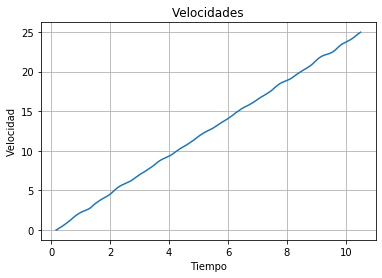

In [20]:
#Graficamos las velocidades
plot(datos[:,0],fun1(datos[:,0],datos[:,1]))
title(r"Velocidades"),xlabel("Tiempo"),ylabel('Velocidad')
grid()
show()

Veamos cuanto discrepan la derivada de estas velocidades con las aceleraciones dadas en los datos.

In [21]:
print('El error máximo entre las aceleraciones dadas con las aceleraciones númericas es:')
print(max(abs(deriv_h5(fun1(datos[:,0],datos[:,1]),datos[:,0])-datos[:,1])))

El error máximo entre las aceleraciones dadas con las aceleraciones númericas es:
5.135026959306935


### 3. Sabemos que $\int_{1}^{\infty}{\frac{dx}{x^{2}}}$, sin embargo numéricamente no es factible utilizar el infinito. De esta manera genere una forma de calcular dicha integral hasta obtener una precisión de 10−3. Explique su procedimiento de tal manera que pueda garantizar el resultado de dicha integral y cual sería su generalización.

No podemos integral de 1 a $\infty$, pero si podemos tomarnos una a tal que la integral a 1 a cumpla con que el error sea de esa magnitud, por lo cual definimos la siguiente función.

In [48]:
#Definimos la función integral del ejercicio 
def int1(f,x):
    #Definimos el espacio entre dos puntos contiguos en la malla
    h = x[2] - x[1]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integral = 0 
    #Definimos la condiciones en las cuales se evaluará nuestra integral:
    #Si la malla en la cual vamos a integrar es par, pedimos que saque la integral a partir de segundo elemento
    if mod(len(f),2) == 0:
        inicio = 2
    #Si el número de puntos en la malla no es par le pedimos que inicie un elemento despues del primer elemento en la malla
    elif mod(len(f),2) == 1:
        inicio = 1
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 2 puntos
    for i in range(inicio,len(f)-1,2):
        integral += f[i+1] + 4*f[i] + f[i-1]
    integral = integral*(h/3)
    #la integral en la frontera es
    if mod(len(f),2) == 0:
        integral += (h/48)*(23*f[0] + 26*f[1] - 4*f[2] + 6*f[3] -3*f[4])
    return integral

In [102]:
def convergencia2 (n,error):
    i=1
    x=linspace(1,i,n)
    while (abs(1-int1(x**(-2),x)))>=error:
        i +=1
        x=linspace(1,i,n)
    return i

In [113]:
print(convergencia2(1000,0.001))

240


In [115]:
x=linspace(1,240,1000)
f=1/(x*x)
print(abs(1-int1(f,x)))

0.0009583327654496543


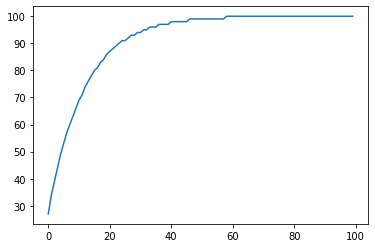

In [119]:
z=linspace(100,500,100)
C=np.zeros(100)
for i in range(len(C)):
    C[i]=convergencia2(20*i+50,0.01)
plot(C)